In [9]:
# !pip install matplotlib==3.8.0

In [ ]:
import os
os._exit(00)


In [1]:
import matplotlib
print(matplotlib.__version__)


3.8.0


In [ ]:
# pip install gwaslab

# GWAS

In [4]:
%cd GWASTutorial/sample_data  

/kaggle/working/GWASTutorial/sample_data


In [37]:
#Sample codes for association test using plink for binary traits

genotypeFile="sample_data.clean" # the clean dataset we generated in previous section
phenotypeFile="/kaggle/working/GWASTutorial/01_Dataset/1kgeas_binary.txt" # the phenotype file
covariateFile="plink_results_projected.sscore" # the PC score file

colName="B1"
threadnum=2

!plink2 \
    --bfile {genotypeFile} \
    --pheno {phenotypeFile} \
    --pheno-name {colName} \
    --maf 0.01 \
    --covar {covariateFile} \
    --covar-col-nums 6-10 \
    --glm hide-covar firth  firth-residualize single-prec-cc \
    --threads {threadnum} \
    --out 1kgeas

PLINK v2.0.0-a.5.23LM AVX2 AMD (29 Jan 2024)       cog-genomics.org/plink/2.0/
(C) 2005-2025 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to 1kgeas.log.
Options in effect:
  --bfile sample_data.clean
  --covar plink_results_projected.sscore
  --covar-col-nums 6-10
  --glm hide-covar firth firth-residualize single-prec-cc
  --maf 0.01
  --out 1kgeas
  --pheno /kaggle/working/GWASTutorial/01_Dataset/1kgeas_binary.txt
  --pheno-name B1
  --threads 2

Start time: Thu Apr  3 22:52:00 2025
32102 MiB RAM detected, ~30854 available; reserving 16051 MiB for main
workspace.
Using up to 2 compute threads.
500 samples (0 females, 0 males, 500 ambiguous; 500 founders) loaded from
sample_data.clean.fam.
1128732 variants loaded from sample_data.clean.bim.
1 binary phenotype loaded (248 cases, 250 controls).
5 covariates loaded from plink_results_projected.sscore.
Calculating allele frequencies... 11172329344046525863697581879298done.
0 variants removed due to allele freque

In [40]:
!head 1kgeas.B1.glm.firth

#CHROM	POS	ID	REF	ALT	PROVISIONAL_REF?	A1	OMITTED	A1_FREQ	TEST	OBS_CT	OR	LOG(OR)_SE	Z_STAT	P	ERRCODE
1	15774	1:15774:G:A	G	A	Y	A	G	0.0282828	ADD	495	0.745933	0.394259	-0.743469	0.457198	.
1	15777	1:15777:A:G	A	G	Y	G	A	0.0737374	ADD	495	0.839642	0.250121	-0.698779	0.48469	.
1	57292	1:57292:C:T	C	T	Y	T	C	0.104675	ADD	492	1.10104	0.215278	0.447121	0.654788	.
1	77874	1:77874:G:A	G	A	Y	A	G	0.0191532	ADD	496	1.12228	0.46275	0.249303	0.803126	.
1	87360	1:87360:C:T	C	T	Y	T	C	0.0231388	ADD	497	1.67353	0.439532	1.17155	0.241379	.
1	125271	1:125271:C:T	C	T	Y	C	T	0.0292339	ADD	496	1.53386	0.373358	1.14579	0.251881	.
1	232449	1:232449:G:A	G	A	Y	A	G	0.185484	ADD	496	0.884097	0.168961	-0.729097	0.465942	.
1	533113	1:533113:A:G	A	G	Y	G	A	0.129555	ADD	494	0.905927	0.196631	-0.502447	0.615353	.
1	565697	1:565697:A:G	A	G	Y	G	A	0.334677	ADD	496	1.04652	0.152859	0.297452	0.766121	.


In [2]:
import gwaslab as gl

In [5]:
sumstats = gl.Sumstats("1kgeas.B1.glm.firth",fmt="plink2")

2025/04/04 00:16:19 GWASLab v3.5.7 https://cloufield.github.io/gwaslab/
2025/04/04 00:16:19 (C) 2022-2025, Yunye He, Kamatani Lab, GPL-3.0 license, gwaslab@gmail.com
2025/04/04 00:16:19 Start to load format from formatbook....
2025/04/04 00:16:19  -plink2 format meta info:
2025/04/04 00:16:19   - format_name  : PLINK2 .glm.firth, .glm.logistic,.glm.linear
2025/04/04 00:16:19   - format_source  : https://www.cog-genomics.org/plink/2.0/formats
2025/04/04 00:16:19   - format_version  : Alpha 3.3 final (3 Jun)
2025/04/04 00:16:19   - last_check_date  :  20220806
2025/04/04 00:16:19  -plink2 to gwaslab format dictionary:
2025/04/04 00:16:19   - plink2 keys: ID,#CHROM,POS,REF,ALT,A1,OBS_CT,A1_FREQ,BETA,LOG(OR)_SE,SE,T_STAT,Z_STAT,P,LOG10_P,MACH_R2,OR
2025/04/04 00:16:19   - gwaslab values: SNPID,CHR,POS,REF,ALT,EA,N,EAF,BETA,SE,SE,T,Z,P,MLOG10P,INFO,OR
2025/04/04 00:16:19 Start to initialize gl.Sumstats from file :1kgeas.B1.glm.firth
2025/04/04 00:16:22  -Reading columns          : A1_FREQ,R

In [6]:
sumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,SE,Z,P,OR,N,STATUS,REF,ALT
0,1:15774:G:A,1,15774,A,G,0.028283,0.394259,-0.743469,0.457198,0.745933,495,9999999,G,A
1,1:15777:A:G,1,15777,G,A,0.073737,0.250121,-0.698779,0.484690,0.839642,495,9999999,A,G
2,1:57292:C:T,1,57292,T,C,0.104675,0.215278,0.447121,0.654788,1.101040,492,9999999,C,T
3,1:77874:G:A,1,77874,A,G,0.019153,0.462750,0.249303,0.803126,1.122280,496,9999999,G,A
4,1:87360:C:T,1,87360,T,C,0.023139,0.439532,1.171550,0.241379,1.673530,497,9999999,C,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128727,22:51217954:G:A,22,51217954,A,G,0.033199,0.362168,-0.995507,0.319490,0.697299,497,9999999,G,A
1128728,22:51218377:G:C,22,51218377,C,G,0.033333,0.362212,-0.994464,0.319997,0.697532,495,9999999,G,C
1128729,22:51218615:T:A,22,51218615,A,T,0.033266,0.362476,-1.029230,0.303370,0.688616,496,9999999,T,A
1128730,22:51222100:G:T,22,51222100,T,G,0.039157,0.323177,0.617825,0.536690,1.221000,498,9999999,G,T


In [7]:
sumstats.get_lead(sig_level=5e-8)

2025/04/04 00:16:28 Start to extract lead variants...v3.5.7
2025/04/04 00:16:28  -Current Dataframe shape : 1128732 x 14 ; Memory usage: 108.66 MB
2025/04/04 00:16:28  -Processing 1128732 variants...
2025/04/04 00:16:28  -Significance threshold : 5e-08
2025/04/04 00:16:28  -Sliding window size: 500  kb
2025/04/04 00:16:29  -Using P for extracting lead variants...
2025/04/04 00:16:29  -Found 63 significant variants in total...
2025/04/04 00:16:29  -Identified 4 lead variants!
2025/04/04 00:16:29 Finished extracting lead variants.


,SNPID,CHR,POS,EA,NEA,EAF,SE,Z,P,OR,N,STATUS,REF,ALT
54904,1:167562605:G:A,1,167562605,A,G,0.391481,0.159644,7.69463,1.419040e-14,3.415780,493,9999999,G,A
113200,2:55587876:T:C,2,55587876,C,T,0.313883,0.167300,-8.02894,9.831660e-16,0.260999,497,9999999,T,C
549705,7:134326056:G:T,7,134326056,T,G,0.134809,0.232017,7.10414,1.210720e-12,5.198060,497,9999999,G,T
1088750,20:42758834:T:C,20,42758834,T,C,0.227273,0.184322,-7.76905,7.907580e-15,0.238828,495,9999999,T,C


2025/04/04 00:16:31 Start to create MQQ plot...v3.5.7:
2025/04/04 00:16:31  -Genomic coordinates version: 99...
2025/04/04 00:16:31  #WARNING! Genomic coordinates version is unknown.
2025/04/04 00:16:31  -Genome-wide significance level to plot is set to 5e-08 ...
2025/04/04 00:16:31  -Raw input contains 1128732 variants...
2025/04/04 00:16:31  -MQQ plot layout mode is : mqq
2025/04/04 00:16:31 Finished loading specified columns from the sumstats.
2025/04/04 00:16:31 Start data conversion and sanity check:
2025/04/04 00:16:31  -Removed 0 variants with nan in CHR or POS column ...
2025/04/04 00:16:31  -Removed 0 variants with CHR <=0...
2025/04/04 00:16:31  -Removed 0 variants with nan in P column ...
2025/04/04 00:16:31  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/04/04 00:16:31  -Sumstats P values are being converted to -log10(P)...
2025/04/04 00:16:32  -Sanity check: 0 na/inf/-inf variants will be removed...
2025/04/04 00:16:32  -Co

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7aff9b155480>)

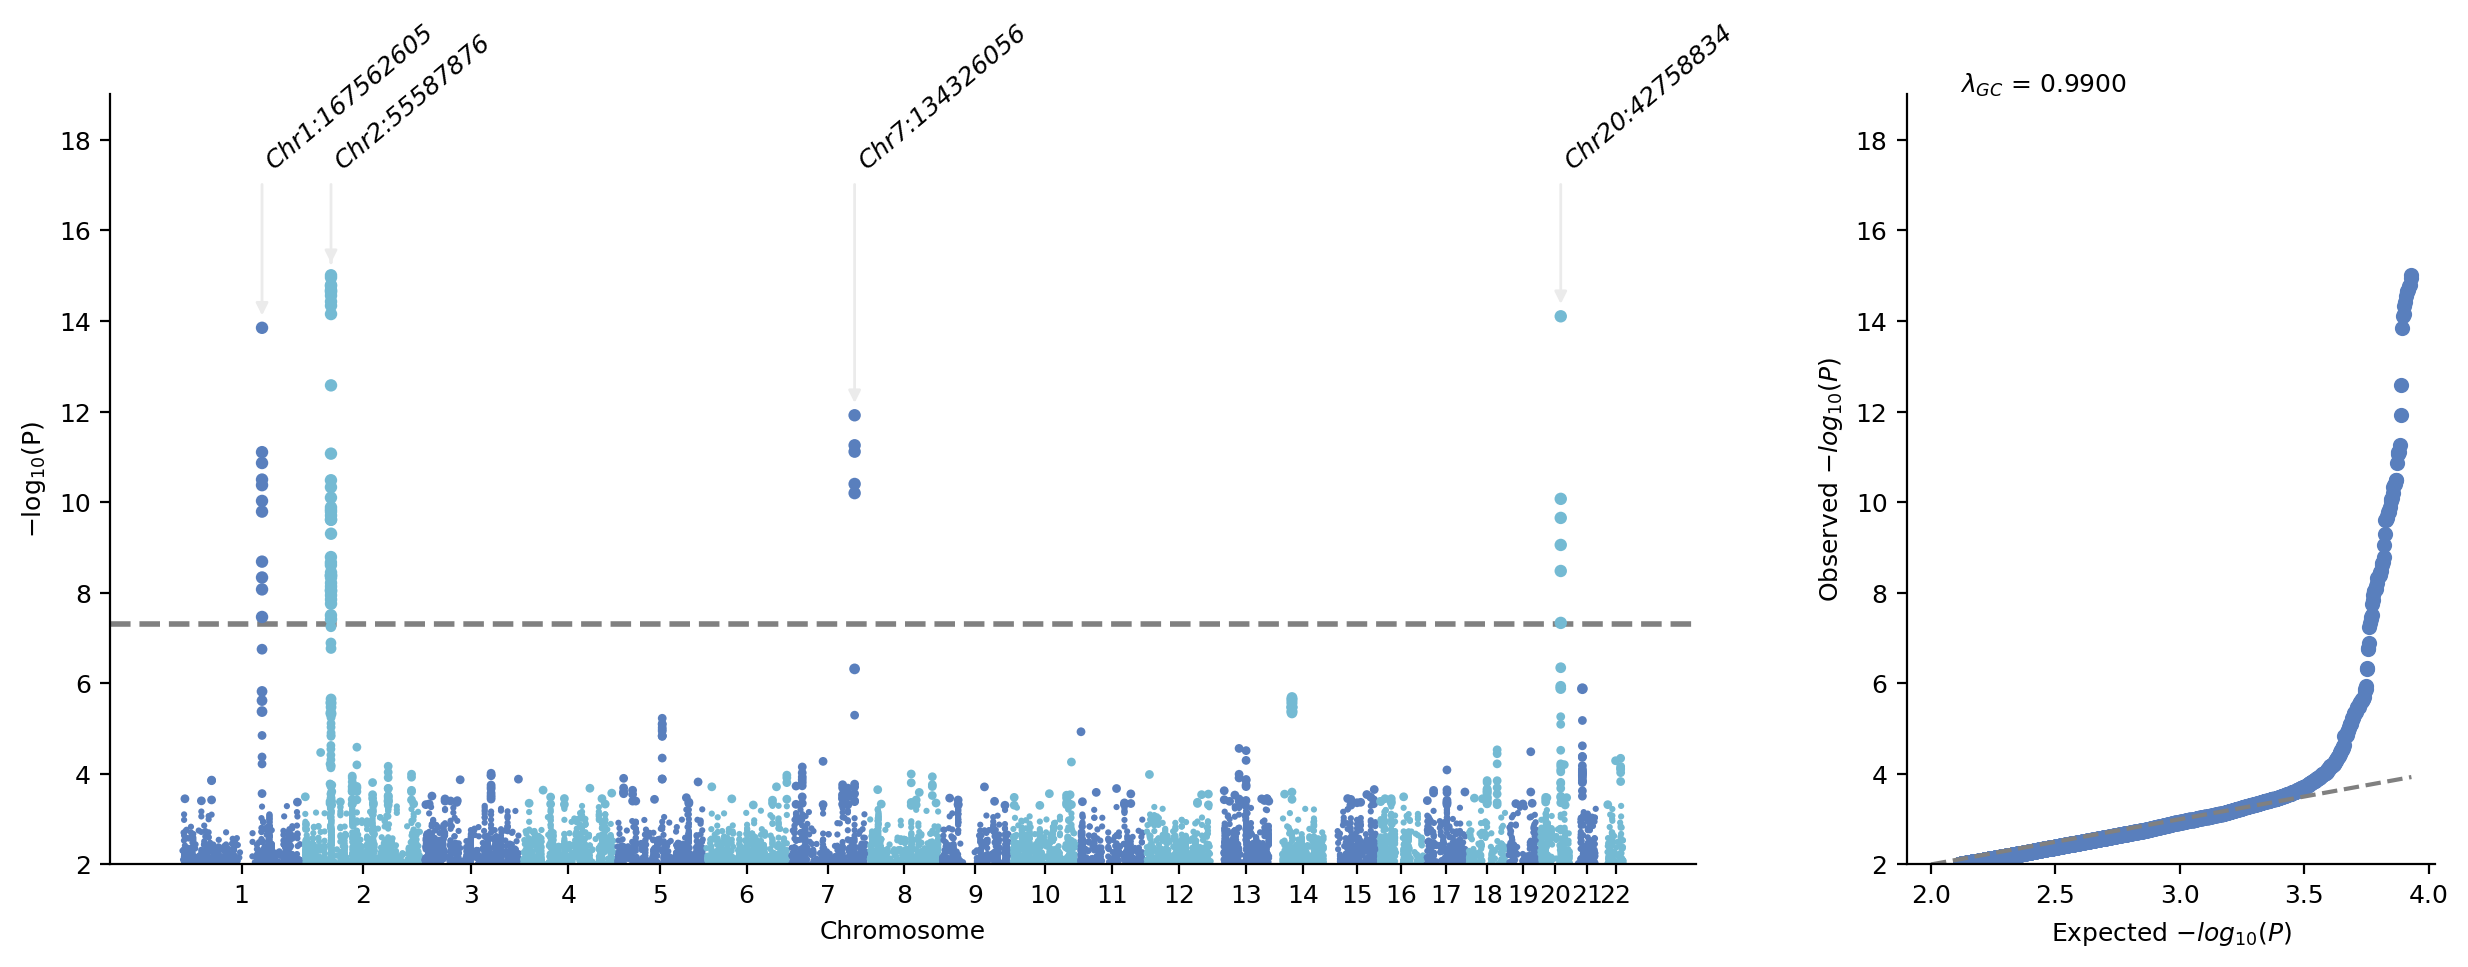

In [8]:
# Create mahattan plot
sumstats.plot_mqq(skip=2, anno=True)

In [10]:
sumstats.basic_check()

2025/04/04 00:22:34 Start to check SNPID/rsID...v3.5.7
2025/04/04 00:22:34  -Current Dataframe shape : 1128732 x 14 ; Memory usage: 108.66 MB
2025/04/04 00:22:34  -Checking SNPID data type...
2025/04/04 00:22:34  -Converting SNPID to pd.string data type...
2025/04/04 00:22:34  -Checking if SNPID is CHR:POS:NEA:EA...(separator: - ,: , _)
2025/04/04 00:22:40 Finished checking SNPID/rsID.
2025/04/04 00:22:40 Start to fix chromosome notation (CHR)...v3.5.7
2025/04/04 00:22:40  -Current Dataframe shape : 1128732 x 14 ; Memory usage: 108.66 MB
2025/04/04 00:22:40  -Checking CHR data type...
2025/04/04 00:22:41  -Variants with standardized chromosome notation: 1128732
2025/04/04 00:22:41  -All CHR are already fixed...
2025/04/04 00:22:44 Finished fixing chromosome notation (CHR).
2025/04/04 00:22:44 Start to fix basepair positions (POS)...v3.5.7
2025/04/04 00:22:44  -Current Dataframe shape : 1128732 x 14 ; Memory usage: 108.66 MB
2025/04/04 00:22:44  -Converting to Int64 data type ...
2025/0

## Create regional plot

2025/04/04 00:23:00 Start to create MQQ plot...v3.5.7:
2025/04/04 00:23:00  -Genomic coordinates version: 19...
2025/04/04 00:23:00  -Genome-wide significance level to plot is set to 5e-08 ...
2025/04/04 00:23:00  -Raw input contains 1128732 variants...
2025/04/04 00:23:00  -MQQ plot layout mode is : r
2025/04/04 00:23:00  -Region to plot : chr2:54513738-56513738.
2025/04/04 00:23:00  -Extract SNPs in region : chr2:54513738-56513738...
2025/04/04 00:23:01  -Extract SNPs in specified regions: 865
2025/04/04 00:23:01 Finished loading specified columns from the sumstats.
2025/04/04 00:23:01 Start data conversion and sanity check:
2025/04/04 00:23:01  -Removed 0 variants with nan in CHR or POS column ...
2025/04/04 00:23:01  -Removed 0 variants with CHR <=0...
2025/04/04 00:23:01  -Removed 0 variants with nan in P column ...
2025/04/04 00:23:01  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/04/04 00:23:01  -Sumstats P values are being conv

(<Figure size 3000x2000 with 3 Axes>, <gwaslab.g_Log.Log at 0x7aff9b155480>)

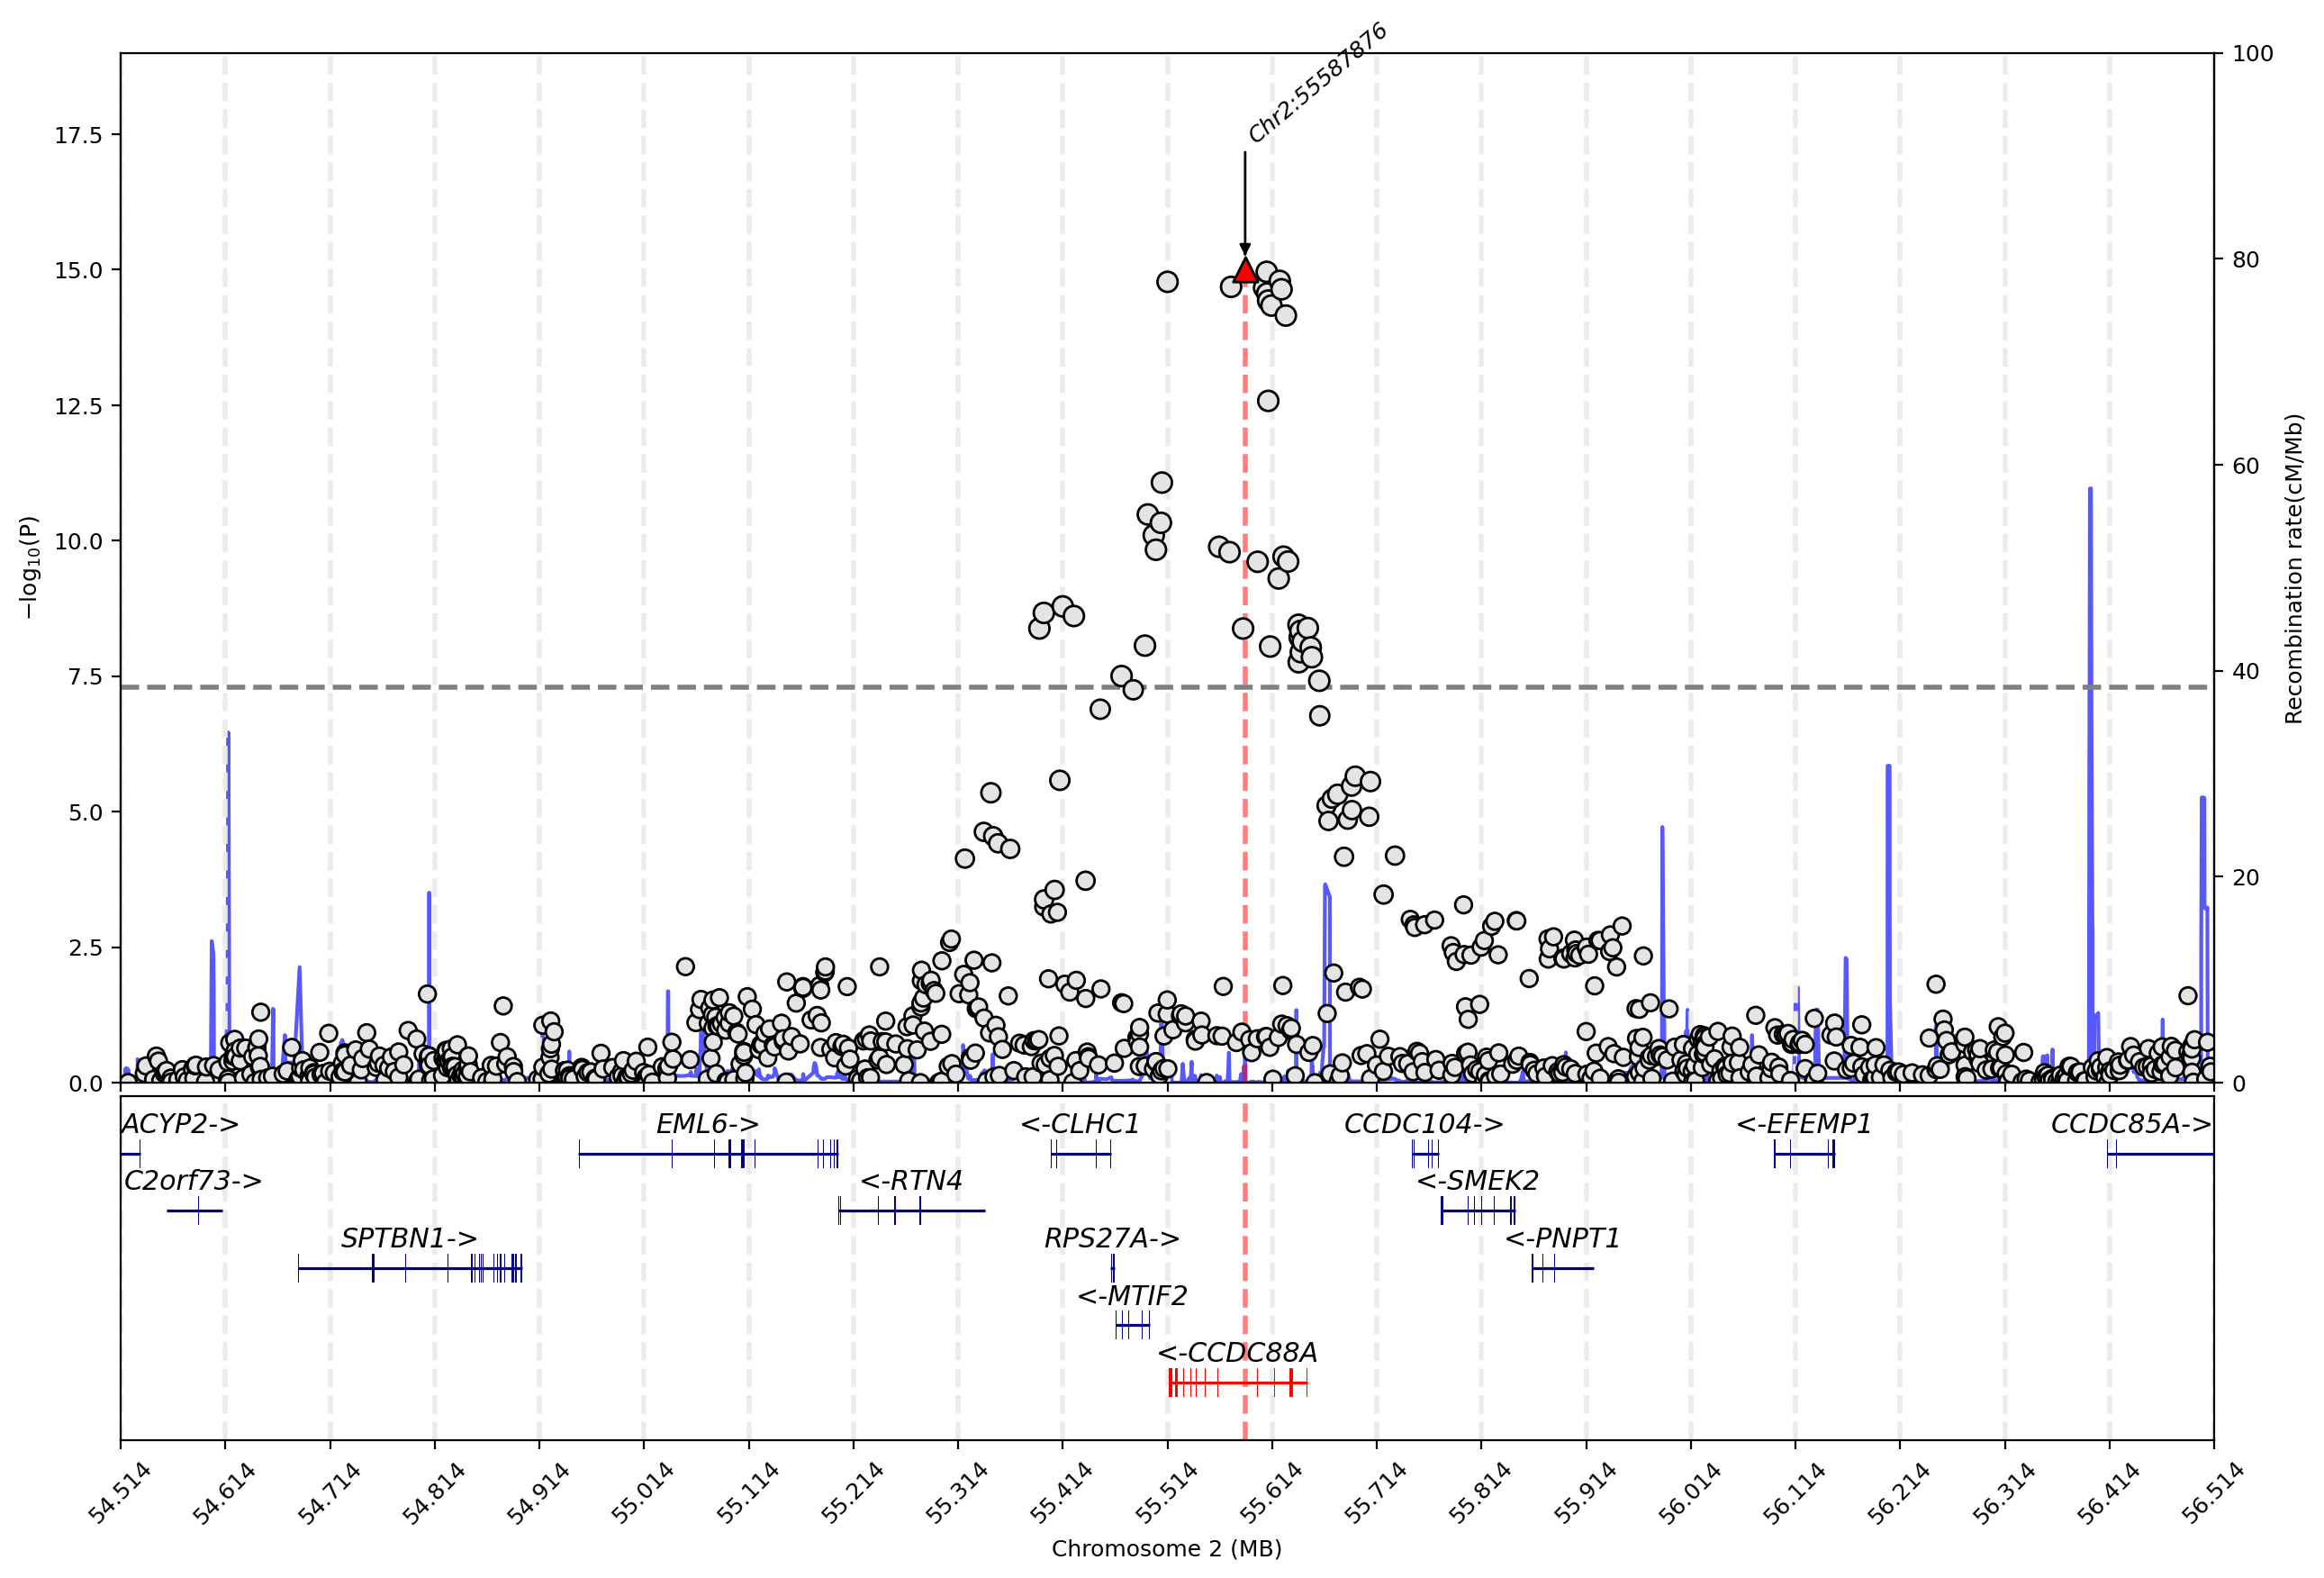

In [11]:
sumstats.plot_mqq(mode="r",anno=True,region=(2,54513738,56513738),region_grid=True,build="19")
#2:55513738

## Create regional plot with LD information

In [20]:
gl.download_ref("1kg_eas_hg19")

2025/04/04 00:41:29 Start to download  1kg_eas_hg19  ...
2025/04/04 00:41:29  -Downloading to: /root/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz
2025/04/04 00:42:22  -File path: /root/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz
2025/04/04 00:42:22  -MD5 check: c8c97434843c0da3113fc06879ead472
2025/04/04 00:42:22  -MD5 verified.
2025/04/04 00:42:22  -Updating record in config file...
2025/04/04 00:42:24  -Updating record in config file...
2025/04/04 00:42:24  -Downloading to: /root/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi
2025/04/04 00:42:24 Downloaded  1kg_eas_hg19  successfully!


2025/04/04 00:42:24 Start to create MQQ plot...v3.5.7:
2025/04/04 00:42:24  -Genomic coordinates version: 19...
2025/04/04 00:42:24  -Genome-wide significance level to plot is set to 5e-08 ...
2025/04/04 00:42:24  -Raw input contains 1128732 variants...
2025/04/04 00:42:24  -MQQ plot layout mode is : r
2025/04/04 00:42:24  -Region to plot : chr2:54531536-56731536.
2025/04/04 00:42:24  -Checking chromosome notations in VCF/BCF files...
2025/04/04 00:42:24  -Checking prefix for chromosomes in VCF/BCF files...
2025/04/04 00:42:24  -No prefix for chromosomes in the VCF/BCF files.
2025/04/04 00:42:24  -Extract SNPs in region : chr2:54531536-56731536...
2025/04/04 00:42:24  -Extract SNPs in specified regions: 967
2025/04/04 00:42:24 Finished loading specified columns from the sumstats.
2025/04/04 00:42:24 Start data conversion and sanity check:
2025/04/04 00:42:24  -Removed 0 variants with nan in CHR or POS column ...
2025/04/04 00:42:24  -Removed 0 variants with CHR <=0...
2025/04/04 00:42:

(<Figure size 3000x2000 with 4 Axes>, <gwaslab.g_Log.Log at 0x7aff9b155480>)

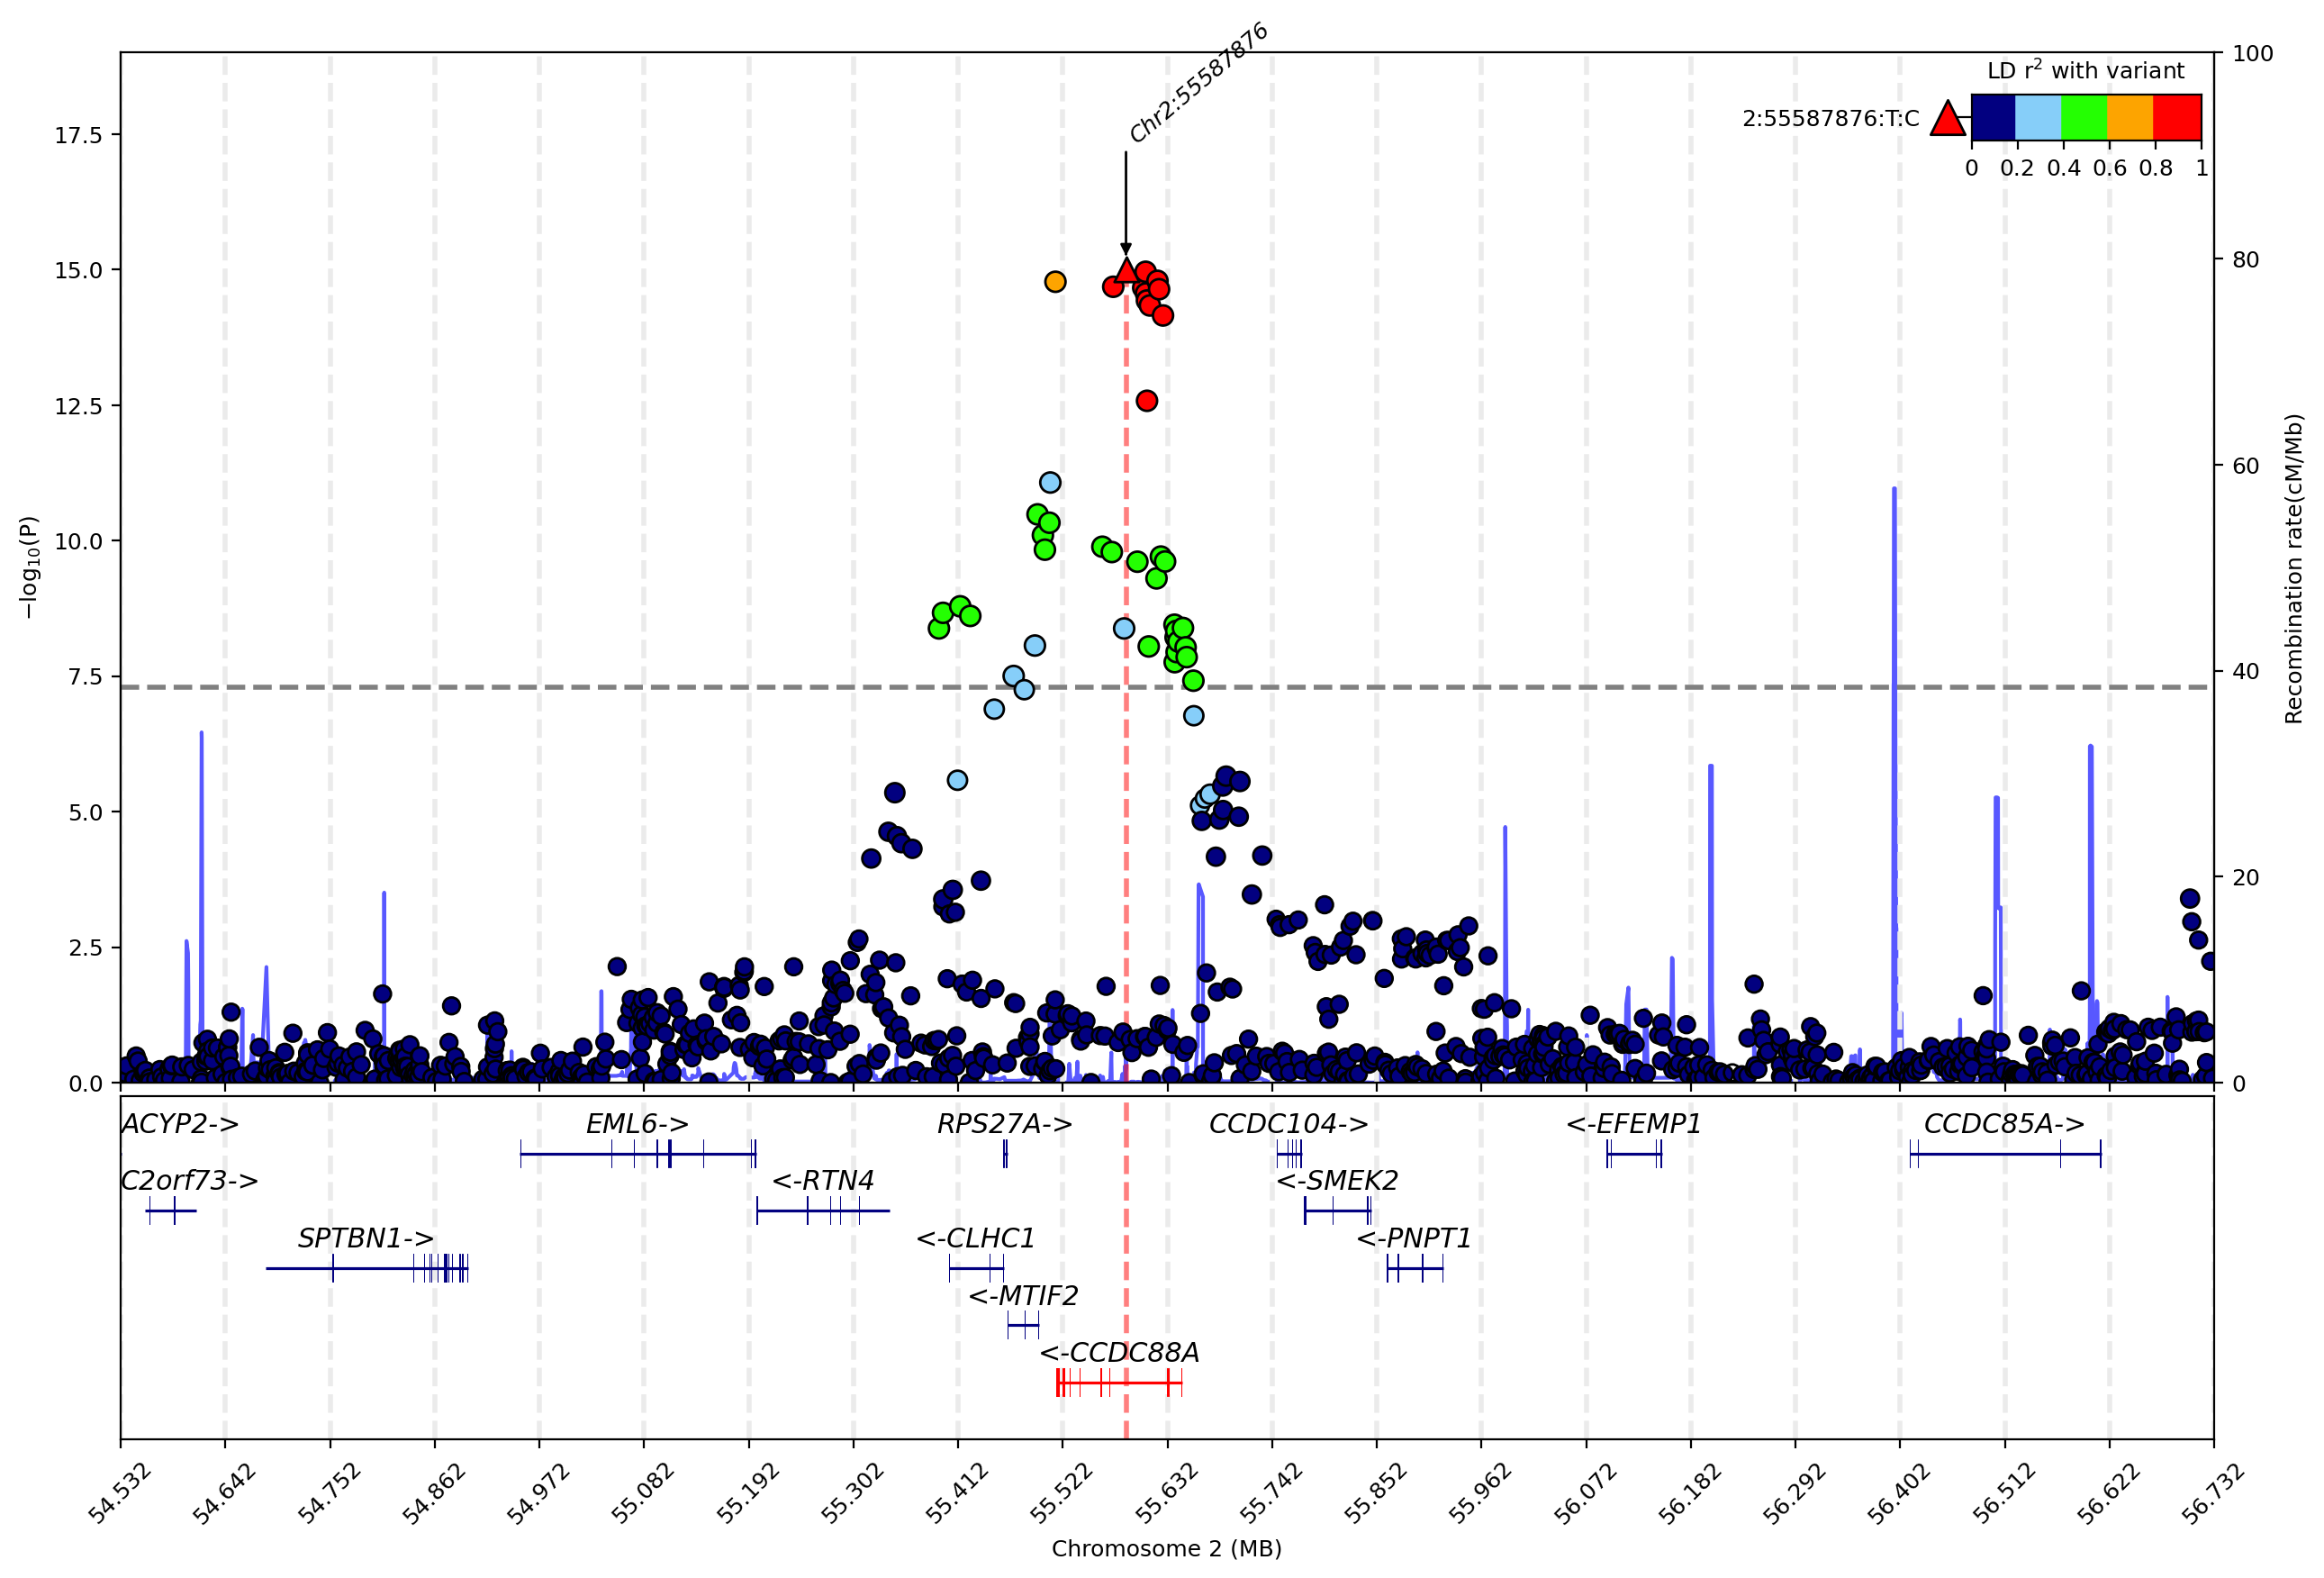

In [21]:
sumstats.plot_mqq(mode="r",anno=True,region=(2,54531536,56731536),region_grid=True,vcf_path=gl.get_path("1kg_eas_hg19"),build="19")